<h1>Big Five Personality Test</h1>

Openness to experience (inventive/curious vs. consistent/cautious)

Conscientiousness (efficient/organized vs. easy-going/careless)

Extroversion (outgoing/energetic vs. solitary/reserved)

Agreeableness (friendly/compassionate vs. challenging/detached)

Neuroticism (sensitive/nervous vs. secure/confident)


Link para projeto e base de dados: https://www.kaggle.com/tunguz/big-five-personality-test

<h3>Import

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open
pd.options.display.max_columns = 150

<h3> Load dataset

In [2]:
data = pd.read_csv('data-final.csv', sep='\t')

In [3]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [5]:
#Deleting irrelevant attributes

data.drop(data.columns[50:110], axis=1, inplace=True)

In [6]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


<h3>Data Analysis

In [7]:
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [8]:
#3720 with 0 value

data["EXT1"].value_counts()

3.00    288622
1.00    249711
2.00    199165
4.00    191638
5.00     80702
0.00      3720
Name: EXT1, dtype: int64

In [9]:
data[(data == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
#Removing samples with 0

data = data[(data > 0.00).all(axis=1)]

In [11]:
data["EXT1"].value_counts()

3.00    247835
1.00    216949
2.00    176207
4.00    166599
5.00     66844
Name: EXT1, dtype: int64

<h3>Clustering - KMeans

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [15]:
kmeans = KMeans()
#visualizer for Elbow method
visualizer = KElbowVisualizer(kmeans, k=(2,10))

In [16]:
data_sample = data.sample(n=5000, random_state=1)

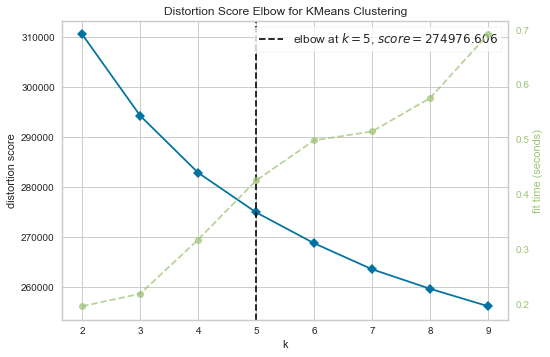

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
visualizer.fit(data_sample)
visualizer.poof()

As expected, the recommended k is 5.

In [18]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

In [19]:
predicoes = k_fit.labels_
data['Clusters'] = predicoes

In [20]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,3
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,4
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,1
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,3


<h3>Analyzing the clusters

In [21]:
data["Clusters"].value_counts()

2    193206
3    182219
4    181492
0    170703
1    146814
Name: Clusters, dtype: int64

In [22]:
data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.81,3.63,2.24,4.06,2.30,3.18,1.75,4.08,2.18,4.49,4.29,2.46,4.52,2.13,3.57,3.90,4.01,3.78,4.01,3.96,2.45,3.39,2.58,3.86,2.55,3.88,2.70,3.45,3.69,3.06,2.82,3.38,3.82,3.50,2.08,3.51,3.56,3.05,2.77,3.31,3.52,2.38,4.08,2.12,3.43,2.08,3.69,3.19,4.29,3.73
1,2.15,3.45,2.80,3.59,2.61,2.87,2.12,3.72,2.69,4.00,2.44,3.72,3.13,3.00,2.39,2.10,2.40,2.01,2.70,2.38,3.08,3.00,2.66,2.87,3.27,2.76,3.13,2.96,2.70,3.08,3.28,2.91,3.83,2.48,2.44,2.82,3.55,2.59,2.89,3.51,3.73,1.96,3.80,2.05,3.79,2.05,4.09,3.31,3.92,3.84
2,3.46,1.91,3.81,2.49,4.06,1.82,3.67,2.76,3.79,2.99,3.82,2.95,4.24,2.42,3.27,3.47,3.80,3.45,3.65,3.18,2.14,4.30,2.66,4.20,2.00,4.01,1.85,3.91,4.13,3.86,2.98,3.63,3.85,3.24,2.22,3.53,3.47,2.83,2.94,3.49,3.78,2.10,4.27,1.95,3.98,1.76,4.00,3.40,4.21,4.21
3,3.46,1.95,4.34,2.23,4.27,1.67,3.88,2.81,3.75,2.53,2.31,3.86,3.14,3.32,2.11,1.90,2.10,1.67,2.11,1.71,1.89,4.44,1.84,4.25,1.87,3.85,1.60,4.10,4.09,4.20,3.75,2.59,4.20,1.90,3.13,2.28,3.88,1.94,3.58,3.89,3.91,1.75,4.09,1.79,4.17,1.66,4.33,3.25,4.11,4.29
4,2.15,3.27,3.12,3.64,3.00,2.69,2.24,3.99,2.34,4.12,3.56,3.07,4.18,2.61,2.84,2.84,2.89,2.46,2.99,2.72,1.86,3.98,1.68,4.38,1.96,4.19,1.99,4.01,4.19,3.74,3.85,2.21,4.30,2.02,3.25,2.06,4.18,2.02,3.85,3.89,3.56,2.17,3.88,2.08,3.71,2.00,4.00,2.96,4.26,3.78


Selecting the columns for each group

In [23]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

Summing the values for each group

In [24]:
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

Mean value for each group

In [25]:
data_soma.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.97,3.66,3.16,3.18,3.25
1,3.00,2.63,2.95,3.03,3.25
2,3.07,3.43,3.31,3.22,3.37
3,3.09,2.42,3.21,3.11,3.34
4,3.06,3.02,3.20,3.16,3.24


Visualization of the mean for each group

In [26]:
data_clusters = data_soma.groupby('clusters').mean()

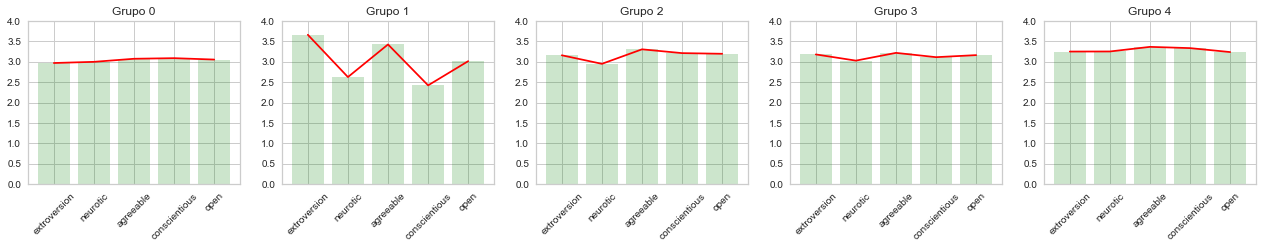

In [27]:
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [29]:
#Gradio for the interface

import gradio as gr

In [30]:
dquestions = open('questions.txt').read().split('\n')

In [31]:
dquestions

['EXT1\tI am the life of the party.',
 "EXT2\tI don't talk a lot.",
 'EXT3\tI feel comfortable around people.',
 'EXT4\tI keep in the background.',
 'EXT5\tI start conversations.',
 'EXT6\tI have little to say.',
 'EXT7\tI talk to a lot of different people at parties.',
 "EXT8\tI don't like to draw attention to myself.",
 "EXT9\tI don't mind being the center of attention.",
 'EXT10\tI am quiet around strangers.',
 'EST1\tI get stressed out easily.',
 'EST2\tI am relaxed most of the time.',
 'EST3\tI worry about things.',
 'EST4\tI seldom feel blue.',
 'EST5\tI am easily disturbed.',
 'EST6\tI get upset easily.',
 'EST7\tI change my mood a lot.',
 'EST8\tI have frequent mood swings.',
 'EST9\tI get irritated easily.',
 'EST10\tI often feel blue.',
 'AGR1\tI feel little concern for others.',
 'AGR2\tI am interested in people.',
 'AGR3\tI insult people.',
 "AGR4\tI sympathize with others' feelings.",
 "AGR5\tI am not interested in other people's problems.",
 'AGR6\tI have a soft heart.',


In [32]:
questions = []
for q in dquestions:
    q = str(q)
    questions.append(q[q.find("\t"):].lstrip())

In [33]:
inputs_questions = []
for q in questions:
    obj_input = gr.inputs.Slider(minimum=1,maximum=5,step=1,default=3,label=q)
    inputs_questions.append(obj_input)

In [48]:
def predict(*outputs_questions):
    outputs_questions = np.array(outputs_questions).reshape(1, -1)
    result = data_clusters.columns[k_fit.predict(outputs_questions)]
    return result[0]

iface = gr.Interface(
                    fn = predict,
                    title = "Big Five Personality",
                    description = "Detect personality traits",
                    inputs = inputs_questions,
                    outputs="text")
iface.launch(share=True)

Running locally at: http://127.0.0.1:7867/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://35500.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7867/',
 'https://35500.gradio.app')